# 01 - Distributions and Random Variables

## 01.0 - Uniform Distributions

Many real world phenomena can be modeled with random variables, which is really usefull when we have uncertainty about the future and we don't have all the information to make decisions.

For example, when rolling a dice, the outcome is uncertain, but we know the possible outcomes (1, 2, 3, 4, 5, 6).

We can model this as a random variable $X$ that takes values in the set {1, 2, 3, 4, 5, 6}. Each outcome in the set is associated with a probability. If the dice is fair, each outcome has the same probability of $\frac{1}{6}$.

We say that $X$ is a discrete random variable because it can take a countable number of values. Continuous random variables, on the other hand, can take uncountably many values. For example, the height of a person is a continuous random variable since it can take any value within a range.

In the case of the dice, if we roll it many times, we can observe the distribution of the outcomes. We can also compute the probability of each outcome. As we roll the dice many times, we can build the empirical distribution of the outcomes.

In [19]:
import random
from collections import Counter

def roll_dice():
    return random.choice([1, 2, 3, 4, 5, 6])

results = [roll_dice() for _ in range(100)]


counts = Counter(results)



In [20]:
import plotly.graph_objects as go


def plot_dice_distribution(counts):
    # Convert counts to a list of tuples (outcome, frequency)
    data = [(outcome, freq) for outcome, freq in counts.items()]

    # Sort the data by outcome
    data.sort(key=lambda x: x[0])

    # Create lists for x and y values
    x_values = [str(item[0]) for item in data]
    y_values = [item[1] for item in data]

    # Create the bar plot
    fig = go.Figure(data=[go.Bar(x=x_values, y=y_values)])

    # Update layout
    fig.update_layout(
        title=f"Distribution of Dice Roll Outcomes (n={sum(y_values)})",
        xaxis_title="Dice Roll Outcome",
        yaxis_title="Frequency",
        bargap=0.2
    )

    # Show the plot
    fig.show()

# Call the function with the counts
plot_dice_distribution(counts)


Not all the outcomes are equally likely yet. As we increase the number of rolls, the empirical distribution will converge to the theoretical distribution of the dice. In the limit, all outcomes will be equally likely, and the probability of each outcome will be $\frac{1}{6}$.

In [21]:
results = [roll_dice() for _ in range(1_000_000)]
counts = Counter(results)
plot_dice_distribution(counts)


In this case, we say that the distribution is **uniform** since all outcomes are equally likely. Uniform distributions can be discrete or continuous.

## 01.2 Normal Distributions

One of the most important continuous distributions is the normal distribution. The normal distribution is also known as the Gaussian distribution or the bell curve. It is a continuous distribution that is symmetric around the mean, with the highest point (mode) at the mean. 

The normal distribution is defined by two parameters: the mean ($\mu$) and the standard deviation ($\sigma$). This is what we call a **two-parameter distribution**.

The normal distribution is defined by the following probability density function:

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

The normal distribution is a continuous distribution, meaning that the probability of any specific value is zero. Instead, we talk about the probability of a range of values.




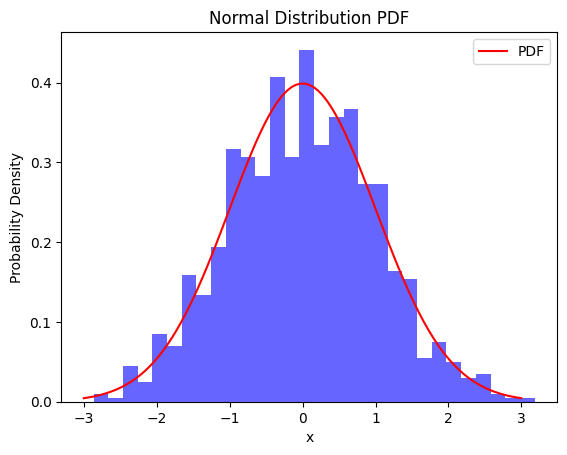

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and standard deviation
mu, sigma = 0,1

# Generate random numbers from the normal distribution
data = np.random.normal(mu, sigma, 1000)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

# Plot the PDF
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, pdf, 'r-', label='PDF')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution PDF')
plt.legend()
plt.show()



As we increase the number of samples, the empirical distribution will converge to the theoretical distribution of the normal distribution.

Notice that the mean is 0 and the standard deviation is 1. 

As the value distance between x and the mean increases, the probability density decreases exponentially. 

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

The normal distirbution is said to have thin tails, meaning that the probability of extreme values (far from the mean) is very low. This is very important in finance, because it assumes that extreme events are rare. In practice, this is not always the case, and wen can heavily underestimate the risk of extreme events if we assume a normal distribution.






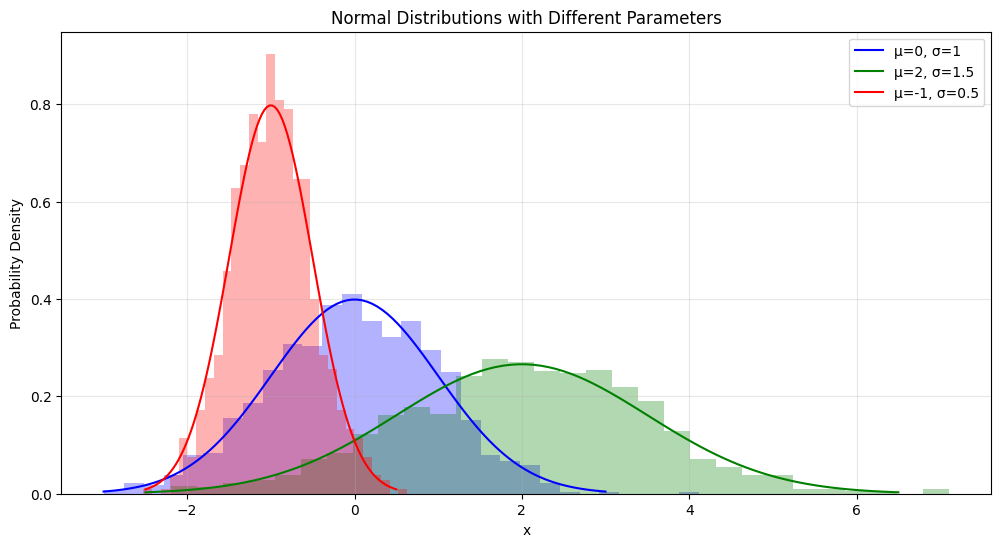

In [23]:
def sample_normal(mu, sigma, size=1000):
    return np.random.normal(mu, sigma, size)

# Generate 3 pairs of simulations
params = [(0, 1), (2, 1.5), (-1, 0.5)]
colors = ['b', 'g', 'r']

plt.figure(figsize=(12, 6))

for (mu, sigma), color in zip(params, colors):
    data = sample_normal(mu, sigma)
    
    # Plot histogram
    plt.hist(data, bins=30, density=True, alpha=0.3, color=color)
    
    # Plot PDF
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    plt.plot(x, pdf, color=color, label=f'μ={mu}, σ={sigma}')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distributions with Different Parameters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 01.3 - Lognormal Distributions

The lognormal distribution is a continuous distribution that is symmetric around the mean. It is a distribution of a random variable whose logarithm is normally distributed. 

The lognormal distribution is defined by two parameters: the mean ($\mu$) and the standard deviation ($\sigma$). This is what we call a **two-parameter distribution**.

The lognormal distribution is defined by the following probability density function:

$$ f(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}} $$




/var/folders/73/rq8rmtq52tb86nmnr0ysb4ch0000gn/T/ipykernel_15759/1303645249.py:15: RuntimeWarning:

divide by zero encountered in divide

/var/folders/73/rq8rmtq52tb86nmnr0ysb4ch0000gn/T/ipykernel_15759/1303645249.py:15: RuntimeWarning:

divide by zero encountered in log

/var/folders/73/rq8rmtq52tb86nmnr0ysb4ch0000gn/T/ipykernel_15759/1303645249.py:15: RuntimeWarning:

invalid value encountered in multiply



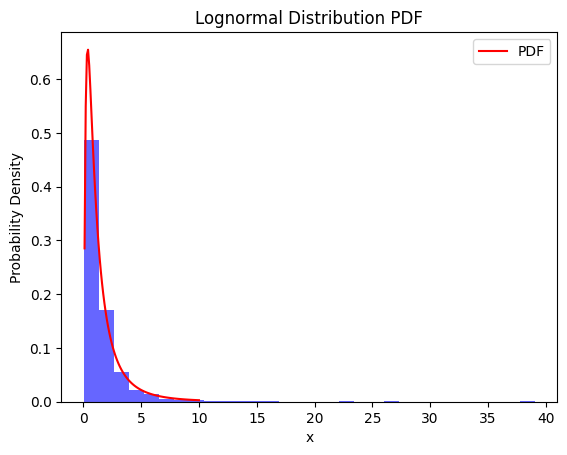

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the lognormal distribution
mu, sigma = 0, 1

# Generate random numbers from the lognormal distribution
data = np.random.lognormal(mu, sigma, 1000)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

# Plot the PDF
x = np.linspace(0, 10, 100)
pdf = (1/(x * sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x) - mu) / sigma) ** 2)
plt.plot(x, pdf, 'r-', label='PDF')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Lognormal Distribution PDF')
plt.legend()
plt.show()






Different from the normal distribution, the lognormal distribution has heavy tails, meaning that the probability of extreme values (far from the mean) is very high.
 
This is very important in finance, because it assumes that extreme events are more likely than in a normal distribution.

## 01.4 Cumulative Distribution Function (CDF)

The cumulative distribution function (CDF) is a function that gives the probability that a random variable $X$ is less than or equal to a certain value $x$. It is defined as:

$$ F(x) = P(X \leq x) $$

The CDF is a powerful tool to understand the distribution of a random variable. It is a non-decreasing function that ranges from 0 to 1.



In the case of continuous random variables, the CDF is the integral of the probability density function (PDF) from negative infinity to $x$.

$$ F(x) = \int_{-\infty}^{x} f(t) dt $$


As we have seen, the PDF is the derivative of the CDF.

$$ f(x) = \frac{dF(x)}{dx} $$

If we integrate the PDF from $a$ to $b$, we get the probability that the random variable $X$ is between $a$ and $b$.

$$ P(a \leq X \leq b) = \int_{a}^{b} f(x) dx = F(b) - F(a) $$

For the CDF to be a probability measure, it must satisfy the following properties:

$$ \lim_{x \to -\infty} F(x) = 0 $$

$$ \lim_{x \to \infty} F(x) = 1 $$  

$$ F(x) \text{ is a non-decreasing function} $$

$$ F(x) \text{ is a right-continuous function} $$























